In [1]:
import datetime

In [2]:
import nltk
import string

In [3]:
import pickle

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [7]:
from collections import Counter

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [10]:
# function to vectorize the type_of_material series into a y target vector.

def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [11]:
#rate of correct predictions out of total predictions

def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')
    print(f'tn:{tn} fp:{fp} fn:{fn} tp:{tp}')

In [12]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    for char in string:
        if char in string.punctuation:
            string = string.replace(char, "")
            
    return string

In [13]:
%%time
#import csv

data = pd.read_csv('/Users/djbetts/Desktop/opinion_classifier/data/only_printed_2019.csv', index_col=0, low_memory=False)

CPU times: user 2.03 s, sys: 279 ms, total: 2.31 s
Wall time: 2.32 s


In [14]:
%%time
df = data.copy()

CPU times: user 6.36 ms, sys: 2.01 ms, total: 8.37 ms
Wall time: 7.52 ms


In [15]:
df.shape

(30232, 21)

In [16]:
df.text.iloc[0]

'North Carolina’s secretary of health on Friday called for an investigation into a hospital where doctors had suspected children with complex heart conditions had been dying at higher than expected rates after undergoing heart surgery.Dr. Mandy Cohen, the secretary, said in a statement that a team from the state’s division of health service regulation would work with federal regulators to conduct a “thorough investigation” into events that occurred in 2016 and 2017 at North Carolina Children’s Hospital, part of the University of North Carolina medical center in Chapel Hill.“As a mother and a doctor my heart goes out to any family that loses a child,” Dr. Cohen said in the statement. “Patient safety, particularly for the most vulnerable children, is paramount.”The investigation is in response to an article published by The New York Times on Thursday, which gave a detailed look inside the medical institution as cardiologists grappled with whether to keep sending their young patients ther

In [17]:
(df.iloc[0])

Unnamed: 0                                                          0
abstract            The state health secretary announced an inquir...
web_url             https://www.nytimes.com/2019/05/31/us/unc-chil...
snippet             The state health secretary announced an inquir...
lead_paragraph      North Carolina’s secretary of health on Friday...
print_section                                                       A
print_page                                                       13.0
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': 'North Carolina to Investigate After ...
keywords            [{'name': 'subject', 'value': 'Hospitals', 'ra...
pub_date                                     2019-06-01T00:03:16+0000
document_type                                                 article
news_desk                                               Investigative
section_name        

In [18]:
(df.iloc[0])

Unnamed: 0                                                          0
abstract            The state health secretary announced an inquir...
web_url             https://www.nytimes.com/2019/05/31/us/unc-chil...
snippet             The state health secretary announced an inquir...
lead_paragraph      North Carolina’s secretary of health on Friday...
print_section                                                       A
print_page                                                       13.0
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': 'North Carolina to Investigate After ...
keywords            [{'name': 'subject', 'value': 'Hospitals', 'ra...
pub_date                                     2019-06-01T00:03:16+0000
document_type                                                 article
news_desk                                               Investigative
section_name        

In [19]:
df.shape

(30232, 21)

In [20]:
(df.iloc[0])

Unnamed: 0                                                          0
abstract            The state health secretary announced an inquir...
web_url             https://www.nytimes.com/2019/05/31/us/unc-chil...
snippet             The state health secretary announced an inquir...
lead_paragraph      North Carolina’s secretary of health on Friday...
print_section                                                       A
print_page                                                       13.0
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': 'North Carolina to Investigate After ...
keywords            [{'name': 'subject', 'value': 'Hospitals', 'ra...
pub_date                                     2019-06-01T00:03:16+0000
document_type                                                 article
news_desk                                               Investigative
section_name        

In [21]:
#sum(df.type_of_material == "News")

In [22]:
#sum(df.type_of_material == "Op-Ed")

In [23]:
df.shape

(30232, 21)

In [24]:
#define X. X is currently pandas series of unsplit strings

X = df.text

In [25]:
#turn series into list...

corpus = list(X)

In [26]:
# define y as a series of op-ed or news

y = df.type_of_material

In [27]:
y

_id
nyt://article/4b1e8a16-71b7-5fac-b1cc-87b459a0a5dd     News
nyt://article/2c929a23-32cb-5794-a320-2a254caa6dc1     News
nyt://article/49a7077e-85df-5fef-a886-a9503d73c657     News
nyt://article/ea6418b4-c464-5be4-86ef-f465d38dade2     News
nyt://article/0ae91997-445f-5dd6-89a6-ea3cf6a550a6     News
                                                      ...  
nyt://article/c6d36069-bd5f-5d16-a368-a5b483305b4b    Op-Ed
nyt://article/d92bfe8d-73cf-5d9f-8cb2-923375c97382     News
nyt://article/0f731777-ab06-52a2-aecb-a7bf0bcea285     News
nyt://article/2c085975-3489-5c75-97e7-8556738b5acb     News
nyt://article/bcc0212f-3e67-5ad7-bc4b-271d5556503d    Op-Ed
Name: type_of_material, Length: 30232, dtype: object

In [28]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_y_ser(y)

CPU times: user 11.6 ms, sys: 419 µs, total: 12 ms
Wall time: 12 ms


In [29]:
y.value_counts()

0    28194
1     2038
Name: type_of_material, dtype: int64

In [30]:
y.shape

(30232,)

# remove stop words

# stemming/lemmatization

In [31]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [32]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [33]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [34]:
snowball_test_token = snowball_tokenize(corpus[0])

In [35]:
snowball_test_token

['north',
 'carolina',
 '’',
 's',
 'secretari',
 'of',
 'health',
 'on',
 'friday',
 'call',
 'for',
 'an',
 'investig',
 'into',
 'a',
 'hospit',
 'where',
 'doctor',
 'had',
 'suspect',
 'children',
 'with',
 'complex',
 'heart',
 'condit',
 'had',
 'been',
 'die',
 'at',
 'higher',
 'than',
 'expect',
 'rate',
 'after',
 'undergo',
 'heart',
 'surgery.dr',
 '.',
 'mandi',
 'cohen',
 ',',
 'the',
 'secretari',
 ',',
 'said',
 'in',
 'a',
 'statement',
 'that',
 'a',
 'team',
 'from',
 'the',
 'state',
 '’',
 's',
 'divis',
 'of',
 'health',
 'servic',
 'regul',
 'would',
 'work',
 'with',
 'feder',
 'regul',
 'to',
 'conduct',
 'a',
 '“',
 'thorough',
 'investig',
 '”',
 'into',
 'event',
 'that',
 'occur',
 'in',
 '2016',
 'and',
 '2017',
 'at',
 'north',
 'carolina',
 'children',
 '’',
 's',
 'hospit',
 ',',
 'part',
 'of',
 'the',
 'univers',
 'of',
 'north',
 'carolina',
 'medic',
 'center',
 'in',
 'chapel',
 'hill.',
 '“',
 'as',
 'a',
 'mother',
 'and',
 'a',
 'doctor',
 'my'

# vectorizer

# SNOWBALL tfidf

In [36]:
# %%time
# #create vectorizer

# snow_vectorizer = TfidfVectorizer(#input='content', 
# #                 encoding='utf-8', 
# #                 decode_error='strict', 
#                  strip_accents='ascii', 
#                  lowercase=True, 
# #                 preprocessor=None, 
#                  tokenizer=snowball_tokenize, 
# #                 analyzer='word', 
#                  stop_words='english', 
# #                 token_pattern='(?u)\b\w\w+\b', 
# #                 ngram_range=(1, 1), 
#                  max_df=0.90, 
#                  min_df=0.10, 
#                  max_features=None, 
# #                 vocabulary=None, 
# #                 binary=False, 
# #                 dtype=<class 'numpy.float64'>, 
# #                 norm='l2', 
# #                 use_idf=True, 
# #                 smooth_idf=True, 
# #                 sublinear_tf=False
# )

<!-- /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent)) -->

# WORDNET tfidf

In [71]:
#function that removes string.punctuation w/out the '?'
def punc_strip(document):
    for char in document:
        if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~”“’—':
            document = document.replace(char, " ")
    return document

In [103]:
stop_words = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','mr','ms','said',]


In [110]:
%%time
#create vectorizer

wordnet_vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
#                 strip_accents='ascii', 
                 lowercase=True, 
                 preprocessor=punc_strip, 
                 tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                stop_words=stop_words, 
#                 token_pattern='(?u)\b\w\w+\b', 
                 ngram_range=(1, 1), 
                 max_df=0.9, 
                 min_df=0.1, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 97 µs, sys: 1e+03 ns, total: 98 µs
Wall time: 105 µs


# test, train, split

In [111]:
#test, train, split

In [112]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# (100935, 563) (33645, 563) (100935,) (33645,)
# CPU times: user 65.7 ms, sys: 16.5 ms, total: 82.2 ms
# Wall time: 81.8 ms

(22674,) (7558,) (22674,) (7558,)
CPU times: user 12.3 ms, sys: 1.84 ms, total: 14.2 ms
Wall time: 13.1 ms


In [113]:
%%time
print(datetime.datetime.now())
X_train =  wordnet_vectorizer.fit_transform(X_train)

2021-01-06 17:19:20.497011
CPU times: user 3min 15s, sys: 2.74 s, total: 3min 18s
Wall time: 3min 21s


In [114]:
%%time
print(datetime.datetime.now())
X_test = wordnet_vectorizer.transform(X_test)

2021-01-06 17:22:41.783385
CPU times: user 1min 3s, sys: 795 ms, total: 1min 4s
Wall time: 1min 5s


In [115]:
vocab = wordnet_vectorizer.vocabulary_

In [116]:
len(vocab)

852

In [117]:
X_train.shape

(22674, 852)

In [118]:
X_test.shape

(7558, 852)

# count vectorizer

In [119]:
# count_vectorizer = CountVectorizer(strip_accents='None',
#                                    lowercase=True,
#                                    tokenizer=snowball_tokenize,
#                                    stop_words='english',
#                                    max_features=None)

# balance classes

In [120]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 1554), (1, 1554)]
RandomUnderSampler(random_state=0)
CPU times: user 23.9 ms, sys: 3.61 ms, total: 27.6 ms
Wall time: 26.9 ms


# random forest classifier

In [121]:
%%time
print(datetime.datetime.now())
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_resampled, y_resampled)
y_pred = rf_clf.predict(X_test)

2021-01-06 17:23:47.157852
CPU times: user 699 ms, sys: 14.7 ms, total: 714 ms
Wall time: 723 ms


In [122]:
y_pred.shape

(7558,)

### metrics y_pred

In [123]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

In [124]:
print(y_test.shape)
print(y_pred.shape)

(7558,)
(7558,)


In [125]:
metrics_(tn, fp, fn, tp)

accuracy = 0.8163535326806033
recall = 0.8512396694214877
precision = 0.23842592592592593
tn:5758 fp:1316 fn:72 tp:412


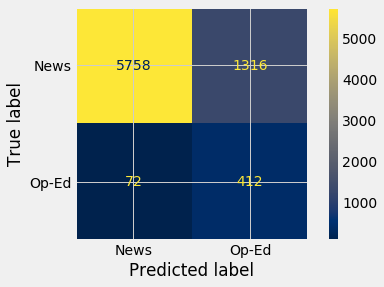

In [126]:
class_names = ["News", "Op-Ed"]

plot_confusion_matrix(estimator=rf_clf,
                      X=X_test,
                      y_true=y_test,
                      display_labels=class_names,
                     cmap='cividis');

# important features

### feature imporance

2021-01-06 17:23:48.347181
CPU times: user 340 ms, sys: 14.2 ms, total: 354 ms
Wall time: 355 ms


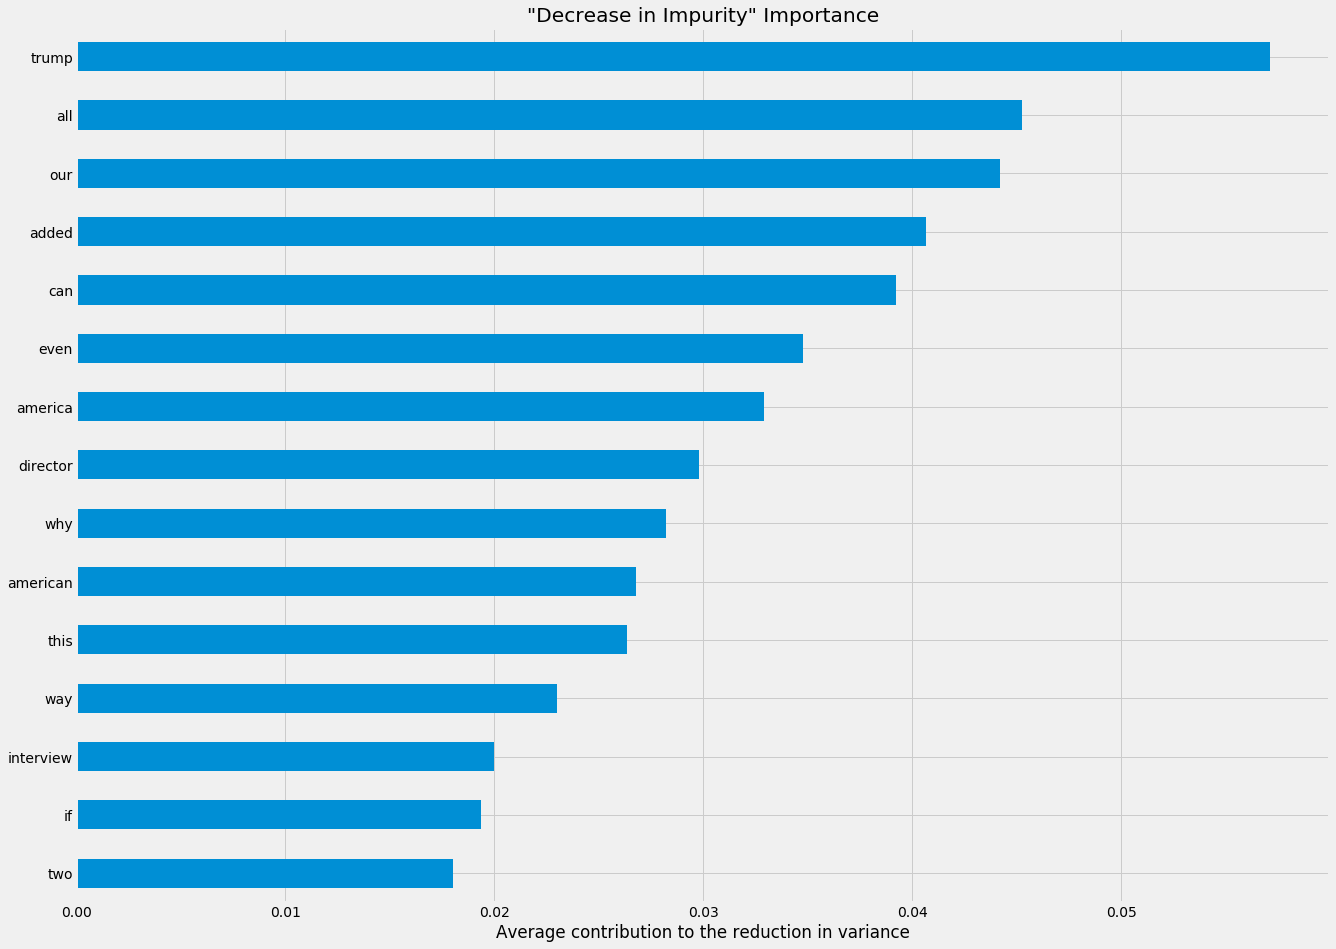

In [127]:
%%time
print(datetime.datetime.now())

feat_names = wordnet_vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_

feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-15:].plot(kind='barh', figsize=(20,15))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance')
plt.savefig('important_feat_bar');

### permutation importance

In [128]:
# %%time
# print(datetime.datetime.now())
# r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feat_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [129]:
len(feat_names)

852

In [130]:
feat_names

['000',
 '1',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '2',
 '20',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',
 '25',
 '3',
 '30',
 '4',
 '40',
 '5',
 '50',
 '500',
 '6',
 '7',
 '8',
 '9',
 'ability',
 'able',
 'about',
 'access',
 'according',
 'account',
 'accused',
 'across',
 'act',
 'action',
 'actually',
 'added',
 'adding',
 'address',
 'administration',
 'after',
 'again',
 'against',
 'age',
 'agency',
 'ago',
 'agreed',
 'ahead',
 'air',
 'all',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'america',
 'american',
 'among',
 'amount',
 'announced',
 'another',
 'answer',
 'any',
 'anyone',
 'anything',
 'appeared',
 'approach',
 'april',
 'are',
 'area',
 'around',
 'art',
 'ask',
 'asked',
 'attack',
 'attempt',
 'attention',
 'authority',
 'available',
 'away',
 'back',
 'bad',
 'based',
 'be',
 'became',
 'because',
 'become',
 'been',
 'before',
 'began',
 'begin',
 'behin

In [131]:
stop_words = wordnet_vectorizer.stop_words_

In [132]:
len(stop_words)

152160

In [133]:
wordnet_vectorizer.fixed_vocabulary_

False

# save model as pickle file

In [134]:
filename = '/Users/djbetts/Desktop/full_dataset.pkl'

In [135]:
#pickle.dump(rf_clf, open(filename, 'wb'))

In [136]:
#loaded_model = pickle.load(open(filename, 'rb'))

In [137]:
#loaded_model.fit(X_resampled, y_resampled)

In [138]:
#result = loaded_model.score(X_resampled, y_resampled)